# Chapter 3. Visualizing Data 

A fundamental part of the data scientist’s toolkit is data visualization. Although it is very easy to create  visualizations, it’s much harder to produce good ones.
There are two primary uses for data visualization:
- To explore data
- To communicate data

This chapter focuses on building the skills that you’ll need to start exploring your own data and to produce the visualizations throughout the rest of the book.

## matplotlib 

A wide variety of tools exist for visualizing data. The `matplotlib` library is widely used although it has been around for a very long time. If you are interested in producing elaborate interactive visualizations for the web, it is likely not the right choice, but for simple bar charts, line charts, and scatterplots, it works pretty well.

`matplotlib` is not a part of the core Python library and needs to be installed in your virtual environment with this command: 

```python 
python -m pip install matplotlib 
```

We will be using `matplotlib.pyplot` module. In its simplest state `pyplot` maintains an internal state in which you build up visualization step by step. Once you're done, you can save it with `savefig` or display it with `show`. 

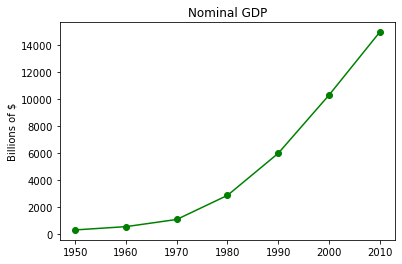

<Figure size 432x288 with 0 Axes>

In [7]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")

plt.show()

plt.savefig('images/viz_gdp.png')

This plot, however, needs to be tweaked a fair bit to be publication quality. You can customize the chart with axis labels, line styles, point markers, etc. These will be covered through different examples later in the book. 

Note: Although this book does not cover this functionality too much, `matplotlib` is capable of producing complicated plots within plots, sophisticated formatting, and interactive visualizations. These can be explored through its official documentation. 

## Bar Charts 
A bar chart is a good choice when you want to show how some quantity varies among some _discrete_ set of items. The example below shows how many Academy Awards were won by each of a variety of movies: 

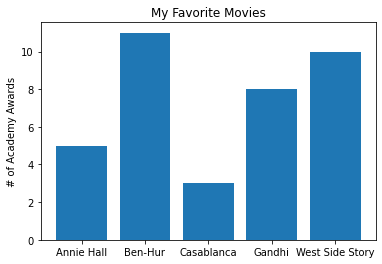

In [9]:
plt.gca().clear()

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

# plt.show()

plt.savefig('images/viz_movies.png')

A bar chart can also be a good choice for plotting histograms of bucketed numeric values, as in the figure below, in order to visually explore how the values are distributed

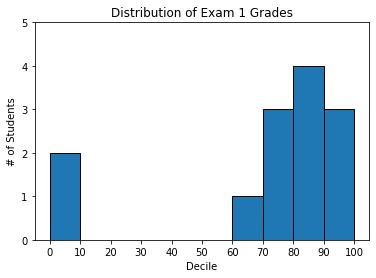

In [10]:
plt.gca().clear()

from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 8
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
# plt.show()

plt.savefig('images/viz_grades.png')

Be judicious when using `plt.axis`. When creating bar charts it is considered especially bad form for your y-axis not to start at 0, since this is an easy way to mislead people

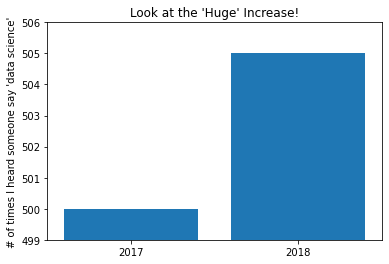

In [12]:
plt.gca().clear()

mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
# plt.show()


plt.savefig('images/viz_misleading_y_axis.png')

In the below example, when more sensible axes are used, and it looks far less impressive

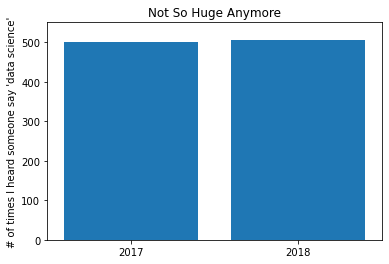

In [15]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
# plt.show()


plt.savefig('images/viz_non_misleading_y_axis.png')

## Line Charts 
Line charts can be made using `plt.plot`. They are a good choice for showing _trends_ 

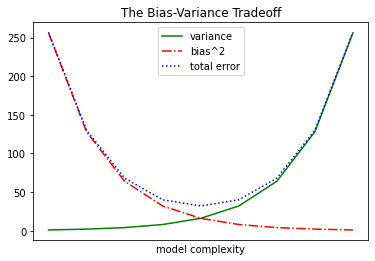

In [19]:
plt.gca().clear()

variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
# plt.show()

plt.savefig('images/viz_line_chart.png')

## Scatterplots 
A scatterplot is the right choice for visualizing the relationship between two paired sets of data. 

The figue below illustrates the relationship between the number of friends your users have and the number of minutes they spend on the site every day

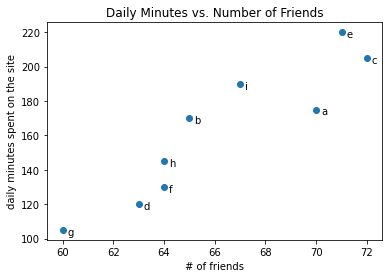

In [21]:
plt.gca().clear()

friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
# plt.show()

plt.savefig('images/viz_scatterplot.png')

If you’re scattering comparable variables, you might get a misleading picture if you let `matplotlib` choose the scale, as in the figure below

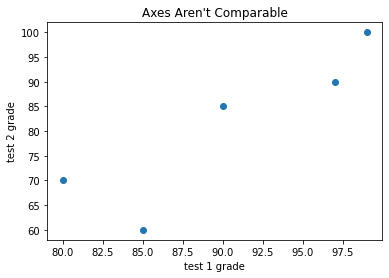

In [23]:
plt.gca().clear()

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
# plt.show()

plt.savefig('images/viz_scatterplot_axes_not_comparable.png')

If we include a call to `plt.axis("equal")`, the plot more accurately shows that most of the variation occurs on test 2

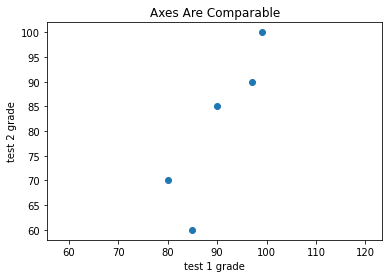

In [26]:
plt.gca().clear()

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_comparable.png')

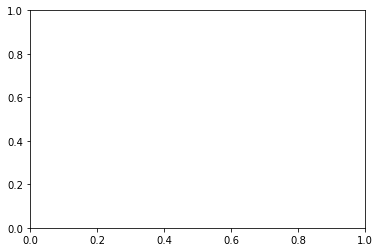

In [27]:
plt.gca().clear()

## For Further Exploration 
- The ['matplotlib'](https://matplotlib.org/2.0.2/gallery.html) Gallery will give you a good idea of the sorts of things you can do with matplotlib (and how to do them)
- ['seaborn'](https://seaborn.pydata.org/) is built on top of matplotlib and allows you to easily produce prettier (and more complex) visualizations
- ['Altair'](https://altair-viz.github.io/) is a newer Python library for creating declarative visualizations
- ['D3.js'](https://d3js.org/) is a JavaScript library for producing sophisticated interactive visualizations for the web. Although it is not in Python, it is widely used, and it is well worth your while to be familiar with it
- ['Bokeh'](https://docs.bokeh.org/en/latest/) is a library that brings D3-style visualizations into Python